# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

## 목표
학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할까?

## 요구사항 분석   
1. 유저들의 학습 패턴
2. 서비스 이용 시간
3. 콘텐츠에 대한 반응
4.  그리고 이들이 얼마나 자주 서비스를 이용하는지

## 가설 설정
1. 구독하는 유저들의 학습패턴이 어떻게 될까?
2. 서비스 이용시간이 긴 사용자들이 구독을 연장하지않을까?
3. 콘텐츠 반응이 좋아야 구독이 연장되지않을까?
   콘텐츠 반응이 좋다=완료한 총 코스 수 가 많다.
4. 얼마나 자주 서비스를 이용했을까?
   자주 서비스 이용의 기준: ??

## 데이터 살펴보기

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import koreanize_matplotlib 

In [6]:
mini = pd.read_table('data/mini.csv',sep=',')

In [7]:
mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [8]:
mini.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [9]:
mini.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


## 데이터 전처리

서비스 이용시간이 긴 사용자들이 구독을 연장하지않을까?

In [10]:
#타입확인
type(mini['average_login_time'][0])

numpy.float64

In [11]:
#사용자의 일반로그인시간을 int형으로 변환
mini['average_login_time_int']=mini['average_login_time'].astype(int)

In [12]:
mini.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,average_login_time_int
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0,14
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1,18
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1,16
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1,17
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1,21


In [13]:
# 시간별 묶기
avg_login_time= mini.groupby('average_login_time_int')['user_id'].count()
avg_login_time

average_login_time_int
2        1
3        4
4        5
5        5
6       25
7       68
8      126
9      246
10     429
11     648
12     918
13    1216
14    1343
15    1310
16    1162
17     900
18     689
19     445
20     236
21     124
22      55
23      24
24      13
25       5
26       3
Name: user_id, dtype: int64

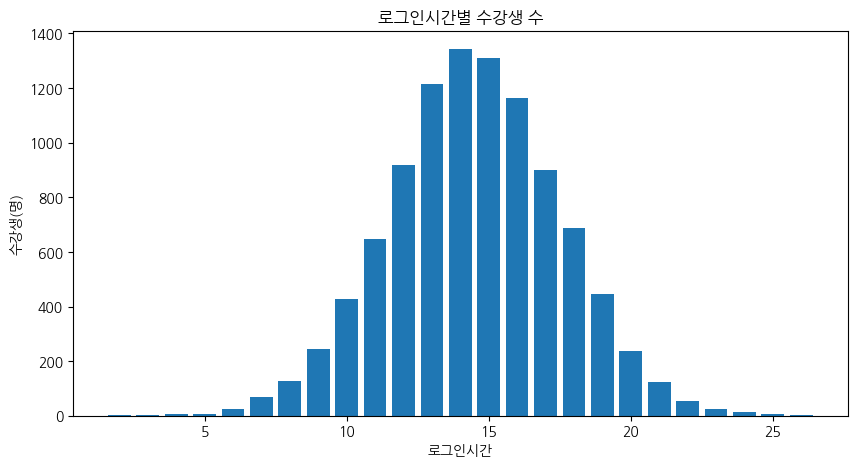

In [14]:
# 사용자로그인시간별 유저수 그래프
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(avg_login_time.index, avg_login_time.values)
#그래프 명
plt.title('로그인시간별 수강생 수')

#그래프 x축 레이블
plt.xlabel('로그인시간')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks()

#그래프 출력
plt.show()

-> 수강생의 로그인시간은 평균 13~16시간일때 많다. 

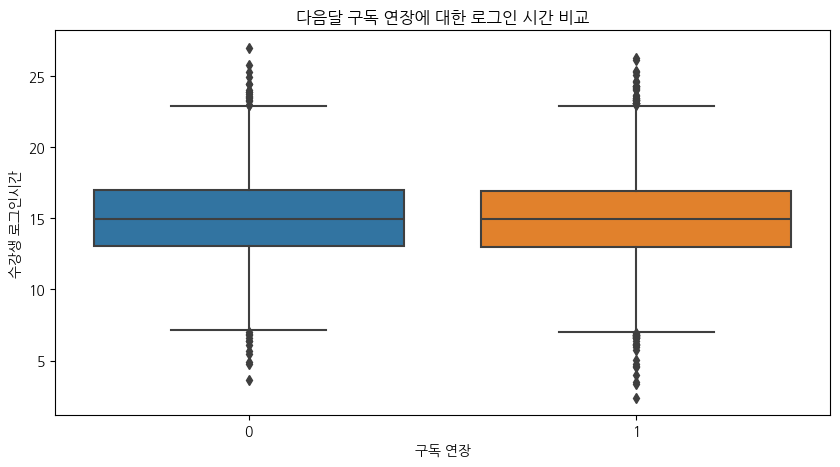

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='target', y='average_login_time', data=mini)
plt.title('다음달 구독 연장에 대한 로그인 시간 비교')
plt.xlabel('구독 연장')
plt.ylabel('수강생 로그인시간')
plt.show()

-> 구독연장하는 사람과 연장하지않는 사람은 로그인시간이 비슷하다.
-> 상관관계 없다.

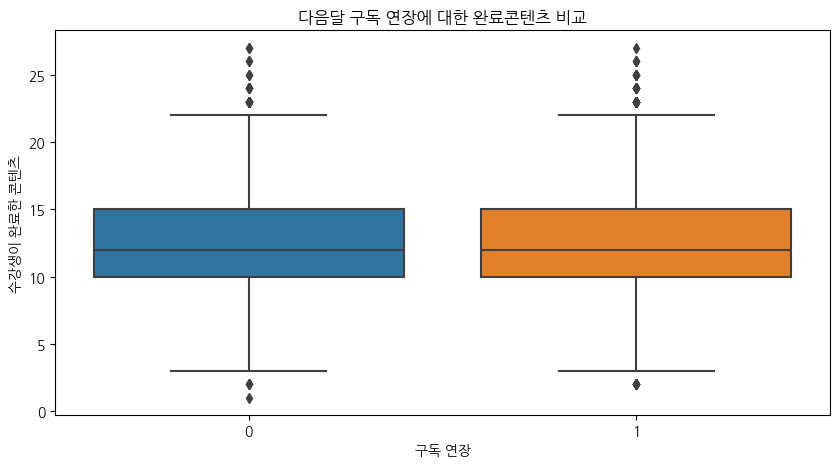

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='target', y='total_completed_courses', data=mini)
plt.title('다음달 구독 연장에 대한 완료콘텐츠 비교')
plt.xlabel('구독 연장')
plt.ylabel('수강생이 완료한 콘텐츠')
plt.show()

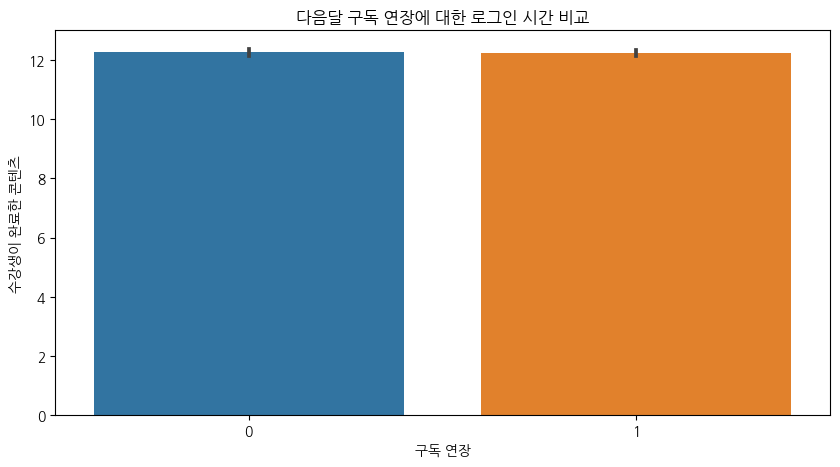

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x='target', y='total_completed_courses', data=mini)
plt.title('다음달 구독 연장에 대한 로그인 시간 비교')
plt.xlabel('구독 연장')
plt.ylabel('수강생이 완료한 콘텐츠')
plt.show()

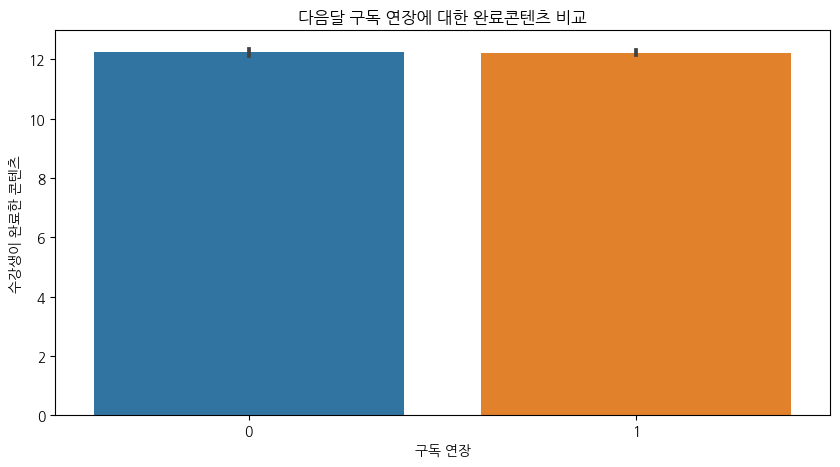

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(x='target', y='total_completed_courses', data=mini)
plt.title('다음달 구독 연장에 대한 완료콘텐츠 비교')
plt.xlabel('구독 연장')
plt.ylabel('수강생이 완료한 콘텐츠')
plt.show()

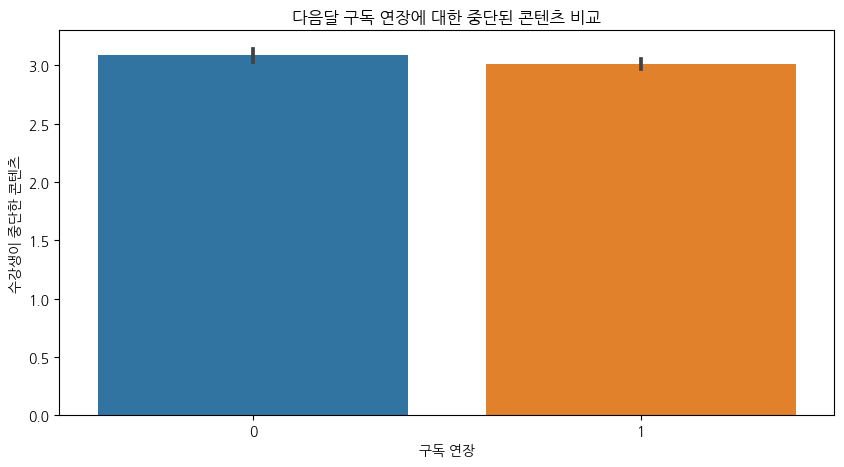

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x='target', y='abandoned_learning_sessions', data=mini)
plt.title('다음달 구독 연장에 대한 중단된 콘텐츠 비교')
plt.xlabel('구독 연장')
plt.ylabel('수강생이 중단한 콘텐츠')
plt.show()

-> 중단된 콘텐츠가 많은 수강생이 콘텐츠를 취소한다. (아주 미미한 차이지만..)

In [21]:
type(mini['average_time_per_learning_session'][0])

numpy.float64

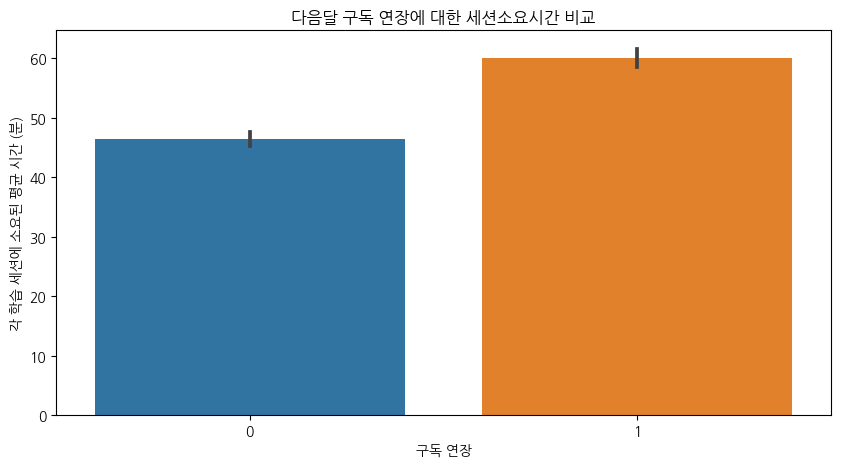

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(x='target', y='average_time_per_learning_session', data=mini)
plt.title('다음달 구독 연장에 대한 세션소요시간 비교')
plt.xlabel('구독 연장')
plt.ylabel('각 학습 세션에 소요된 평균 시간 (분)')

plt.show()

-> 소요시간이 오래걸리는 사용자일수 구독 연장할 가능성이 높다. 

In [23]:
# 그럼 세션소요시간을 범주를 나눠보자? 
avg_learning_session= mini.groupby('average_time_per_learning_session')['target'].count()
avg_learning_session

average_time_per_learning_session
0.011515      1
0.012562      1
0.013535      1
0.017473      1
0.029555      1
             ..
444.324058    1
447.095844    1
470.289498    1
490.233443    1
503.372616    1
Name: target, Length: 10000, dtype: int64

C:\Users\sumin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


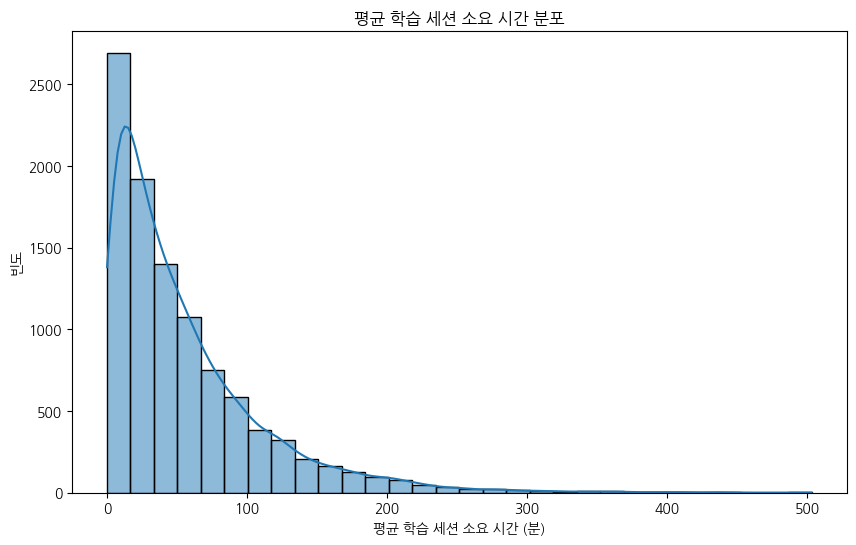

In [24]:
# ㅎ 이건 버릴거...
plt.figure(figsize=(10, 6))
sns.histplot(mini['average_time_per_learning_session'], bins=30, kde=True)
plt.title('평균 학습 세션 소요 시간 분포')
plt.xlabel('평균 학습 세션 소요 시간 (분)')
plt.ylabel('빈도')
plt.show()

평균 학습 세션 소요 시간의 중앙값: 37.57881776667051분
target            0      1
long_session              
False         40.16  59.84
True          35.86  64.14


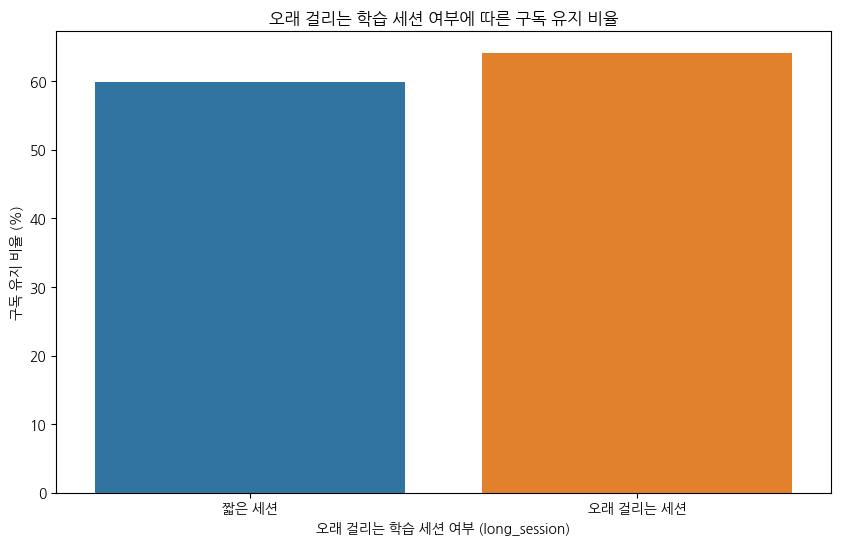

In [25]:
# average_time_per_learning_session의 중앙값 계산
median_time = mini['average_time_per_learning_session'].median()
print(f"평균 학습 세션 소요 시간의 중앙값: {median_time}분")

# 중앙값을 기준으로 오래 걸리는 학습 세션 여부 추가
mini['long_session'] = mini['average_time_per_learning_session'] > median_time

# long_session과 target 간의 관계 분석
long_session_target = pd.crosstab(mini['long_session'], mini['target'], normalize='index') * 100
print(long_session_target)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=long_session_target.index, y=long_session_target[1])
plt.title('오래 걸리는 학습 세션 여부에 따른 구독 유지 비율')
plt.xlabel('오래 걸리는 학습 세션 여부 (long_session)')
plt.ylabel('구독 유지 비율 (%)')
plt.xticks([0, 1], ['짧은 세션', '오래 걸리는 세션'])
plt.show()

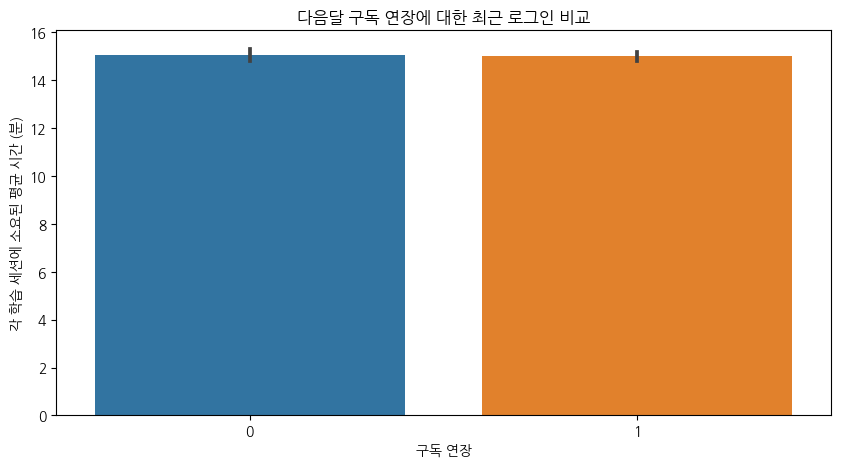

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(x='target', y='recent_login_time', data=mini)
plt.title('다음달 구독 연장에 대한 최근 로그인 비교')
plt.xlabel('구독 연장')
plt.ylabel('각 학습 세션에 소요된 평균 시간 (분)')
plt.show()

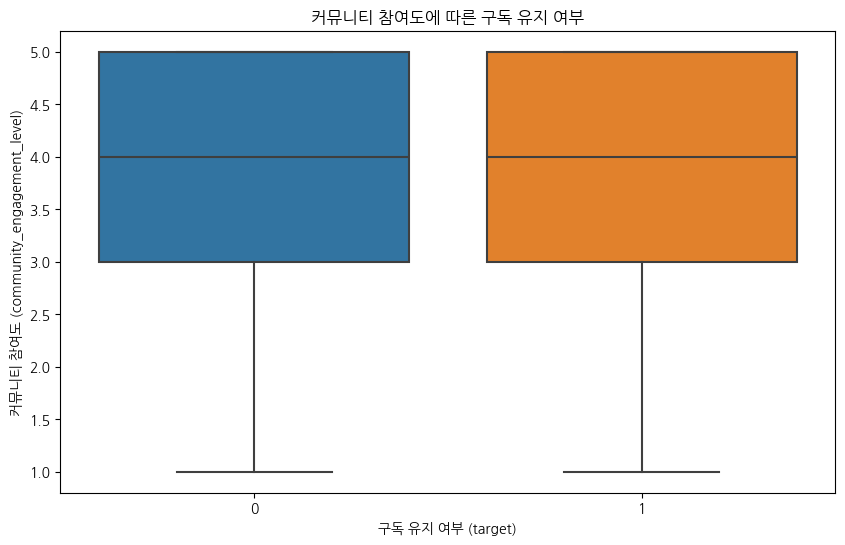

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='community_engagement_level', data=mini)
plt.title('커뮤니티 참여도에 따른 구독 유지 여부')
plt.xlabel('구독 유지 여부 (target)')
plt.ylabel('커뮤니티 참여도 (community_engagement_level)')
plt.show()

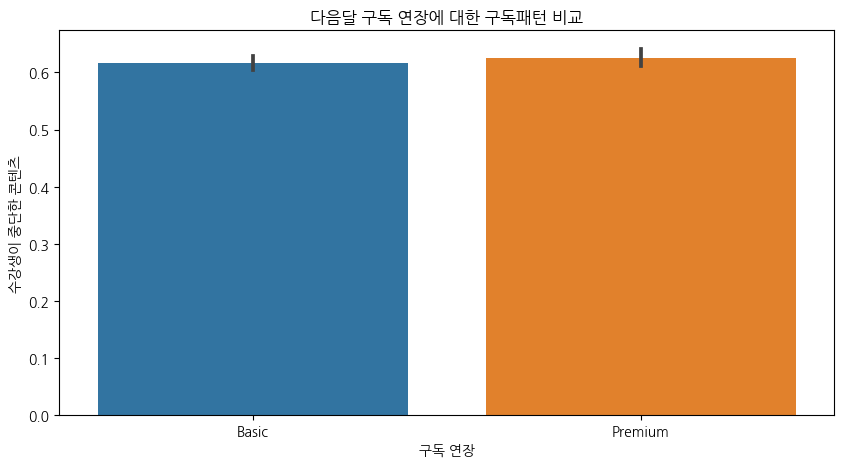

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(x='subscription_type', y='target', data=mini)
plt.title('다음달 구독 연장에 대한 구독패턴 비교')
plt.xlabel('구독 연장')
plt.ylabel('수강생이 중단한 콘텐츠')
plt.show()

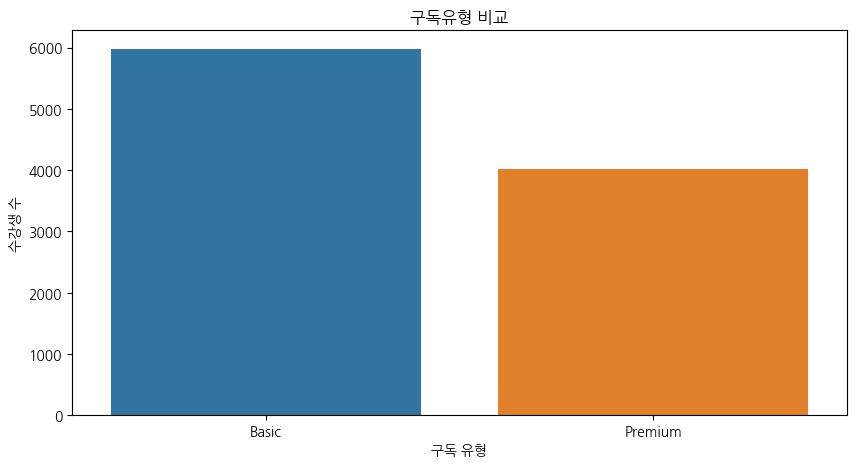

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(x='subscription_type', data=mini)
plt.title('구독유형 비교')
plt.xlabel('구독 유형')
plt.ylabel('수강생 수')
plt.show()

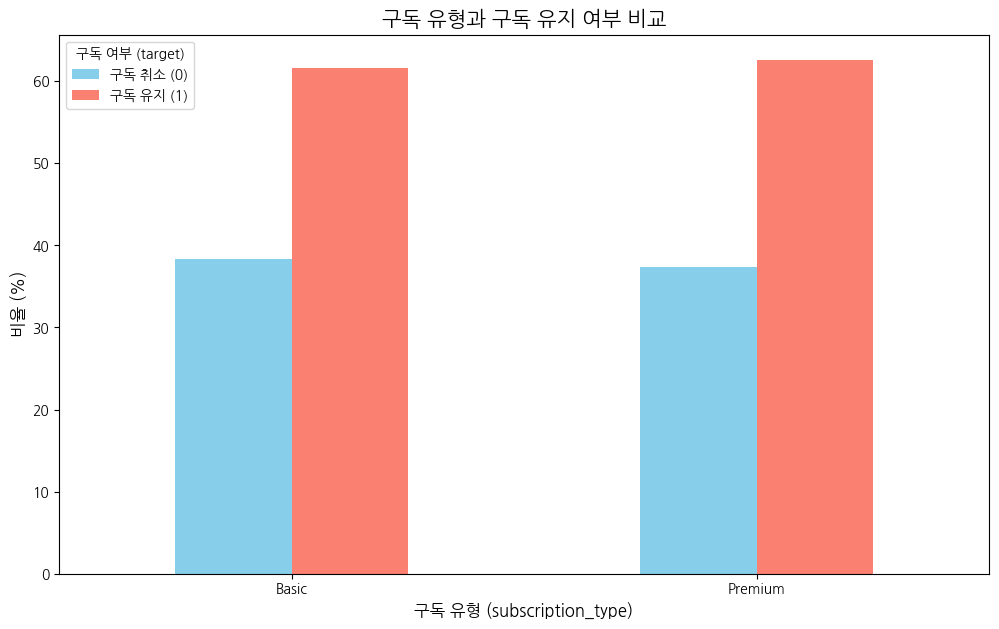

In [30]:
# 구독 유형과 타겟 간의 교차표 생성
subscription_target = pd.crosstab(mini['subscription_type'], mini['target'], normalize='index') * 100

# 다중 막대 그래프 그리기
subscription_target.plot(kind='bar', figsize=(12, 7), color=['skyblue', 'salmon'])
plt.title('구독 유형과 구독 유지 여부 비교', fontsize=15)
plt.xlabel('구독 유형 (subscription_type)', fontsize=12)
plt.ylabel('비율 (%)', fontsize=12)
plt.legend(['구독 취소 (0)', '구독 유지 (1)'], title='구독 여부 (target)')
plt.xticks(rotation=0)

# 그래프 출력
plt.show()

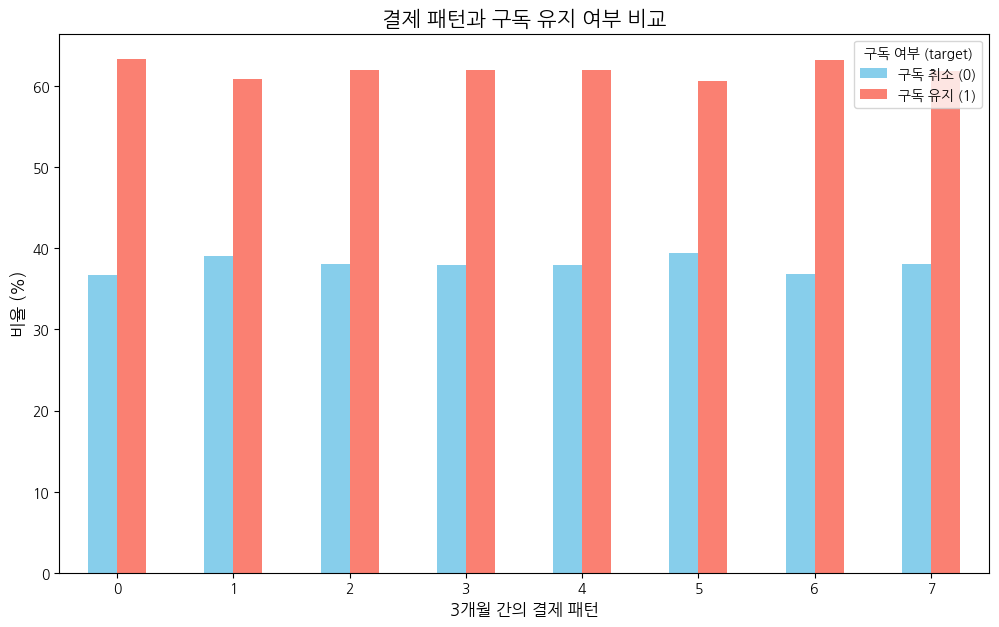

In [31]:
payment_target = pd.crosstab(mini['payment_pattern'], mini['target'], normalize='index') * 100

# 다중 막대 그래프 그리기
payment_target.plot(kind='bar', figsize=(12, 7), color=['skyblue', 'salmon'])

# 그래프 제목 및 축 레이블 설정
plt.title('결제 패턴과 구독 유지 여부 비교', fontsize=15)
plt.xlabel('3개월 간의 결제 패턴', fontsize=12)
plt.ylabel('비율 (%)', fontsize=12)
plt.legend(['구독 취소 (0)', '구독 유지 (1)'], title='구독 여부 (target)')
plt.xticks(rotation=0)

# 그래프 출력
plt.show()

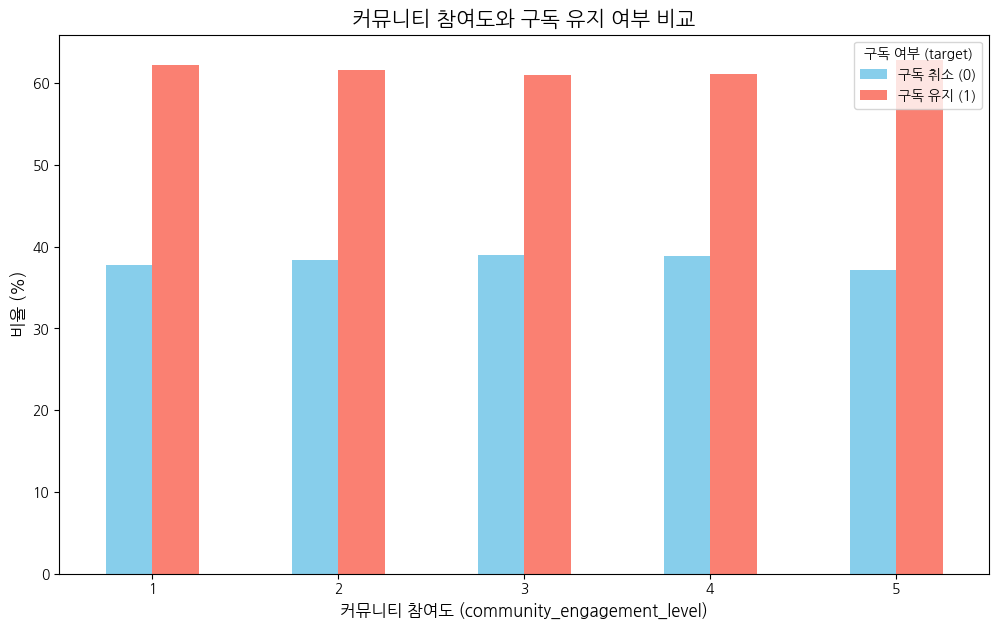

In [36]:
# community_engagement_level과 target 간의 교차표 생성
community_target = pd.crosstab(mini['community_engagement_level'], mini['target'], normalize='index') *100

# 다중 막대 그래프 그리기
community_target.plot(kind='bar', figsize=(12, 7), color=['skyblue', 'salmon'])

# 그래프 제목 및 축 레이블 설정
plt.title('커뮤니티 참여도와 구독 유지 여부 비교', fontsize=15)
plt.xlabel('커뮤니티 참여도 (community_engagement_level)', fontsize=12)
plt.ylabel('비율 (%)', fontsize=12)
plt.legend(['구독 취소 (0)', '구독 유지 (1)'], title='구독 여부 (target)')
plt.xticks(rotation=0)

# 그래프 출력
plt.show()

<Figure size 1200x700 with 0 Axes>

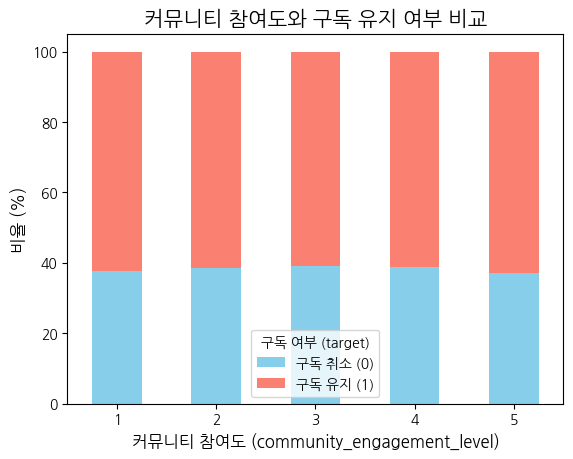

In [33]:
community_target = pd.crosstab(mini['community_engagement_level'], mini['target'], normalize='index') * 100

# 시각화
plt.figure(figsize=(12, 7))
community_target.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

# 그래프 제목 및 축 레이블 설정
plt.title('커뮤니티 참여도와 구독 유지 여부 비교', fontsize=15)
plt.xlabel('커뮤니티 참여도 (community_engagement_level)', fontsize=12)
plt.ylabel('비율 (%)', fontsize=12)
plt.legend(['구독 취소 (0)', '구독 유지 (1)'], title='구독 여부 (target)')
plt.xticks(rotation=0)

# 그래프 출력
plt.show()